0.519628
0.519833
[0.5, 0.0]


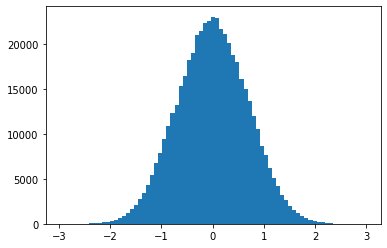

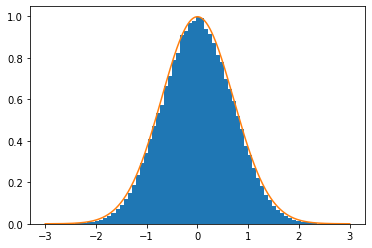

0.83142
0.739735
0.645198
0.560382
0.493436
0.449566
0.420034
0.395242
0.375961
0.358446
0.342815
0.328673
0.317452
0.307534
0.297523
0.28946
0.280943
0.272245
0.265658
0.258847
0.253601
0.248602
0.242006
0.237216
0.233442
0.229207
0.224916
0.220486
0.216305
0.21397
0.210317
0.207179
0.204261
0.201115
0.198203
0.195128
0.192646
0.190805


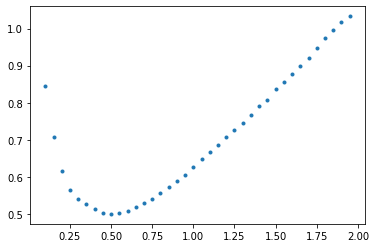

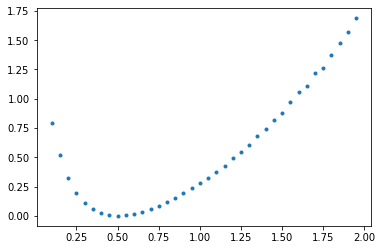

In [1]:
import Library.DIY as t1
import math
import matplotlib.pyplot as plt
import numpy as np

def f4(x,L):
    return 1

def px(x,L):
    return np.exp(-2*L*(x**2))
    #return L*np.exp(-L*x)/(1-np.exp(-np.pi*L)) 
    
def Ex(x,L):
    return L+(0.5-2*(L**2))*(x**2)
    
V,r= t1.markov_sampling(1000000,-3,3,px,0.5,0,4)

def Px(x,L):
    return np.exp(-2*L*(x**2))/r

V,r= t1.markov_sampling(1000000,-3,3,Px,0.5,0,4)

print(t1.importance_sampling(Ex,f4,f4,V,0.5))

t1.markov_sample_plotter(Px,V,-3,3,0.5,r)


t1.markov_solution_plotter(Ex,f4,Px,0.1,2,1000000,-3,3,0,3.6) 

# x,t= t1.markov_sampling(1000000,-3,3,px,3,0,2000)

# def Qx(x,L):
#     return np.exp(-2*L*(x**2))/t

# x,t= t1.markov_sampling(1000000,-3,3,Qx,3,0,2000)

# t1.markov_sample_plotter(Qx,x,-3,3,3,t)

# print(t1.importance_sampling(Ex,f4,f4,x,3))

#(integrand,pdf,guess_pdf,para1,para2,N,x,y,x0,h)

[1.5726851847787993, 0.07413655531080332]
[1.5940095271207348, 0.12168244181266175]


C:\Users\Deependra Singh\AppData\Local\Temp\ipykernel_49112\673520638.py:8: RuntimeWarning: invalid value encountered in log
  return -(1/L)*np.log(1-(1-np.exp(-np.pi*L))*x)


0.0
[nan, nan]


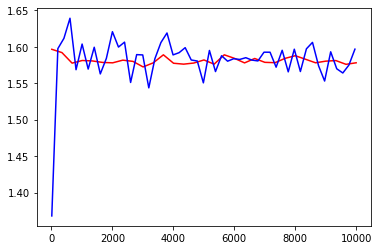

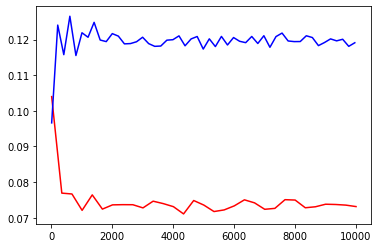

<Figure size 432x288 with 0 Axes>

In [8]:
def f1(x,L):
    return 1/(x**2 + np.cos(x)**2)

def f2(x,L):
    return L*np.exp(-L*x)/(1-np.exp(-np.pi*L)) 

def f3(x,L):
    return -(1/L)*np.log(1-(1-np.exp(-np.pi*L))*x)  

def f4(x,L):
    return 1


x = t1.inverse_sampling(f3,10000,0.1,0.8) #inverse_sampling(cpdf,N,seed,parameter)

print(t1.importance_sampling(f1,f4,f2,x,0.8))

x = t1.LCG2(10000,0,np.pi,0.1)

print(t1.montec(f1,0,np.pi,10000,x))

A,B,C=t1.solution_plotter(f1,f4,f2,0.8,f3,10000,0.1)
P,Q,R=t1.crude_montec_plotter(f1,0,np.pi,10000,0.1)

figure1=plt.figure()
plt.plot(A,B,color='red')
plt.plot(P,Q,color='blue')

figure2=plt.figure()
plt.plot(A,C,color='red')
plt.plot(P,R,color='blue')

# figure3=plt.figure()
# x= t1.markov_sampling(1000000,0,np.pi,f3,0.8,np.pi/2,1)
# print(t1.importance_sampling(f1,f4,f3,x,0.8))

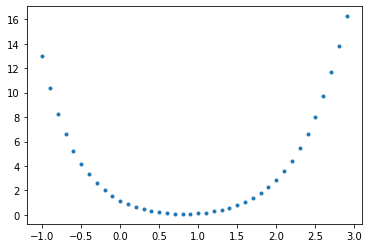

In [3]:
t1.minimizer(-1,3,f1,f4,f2,f3,10000,0.1,0.1)

0.520648


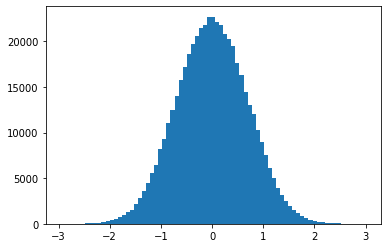

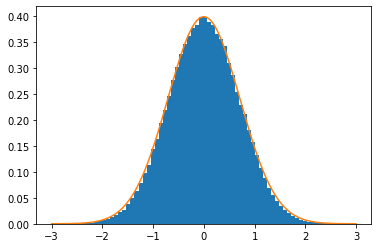

[3.5700926188775974, 1208.3501989060323]
0.153653


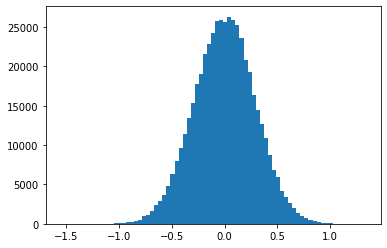

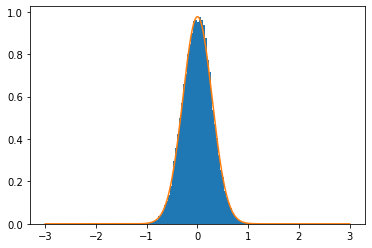

0.70954
0.59088
0.47661
0.3746
0.30974
0.27367
0.25227
0.2368
0.22672
0.21718
0.20681
0.19794
0.19238
0.18636
0.18
0.1744
0.16511
0.16236
0.16033
0.15493
0.15253
0.14978
0.14605
0.14311
0.13743
0.13693
0.1334
0.12976
0.12961
0.12917
0.12613
0.12505
0.12206
0.11955
0.11912
0.11751
0.1151
0.11517


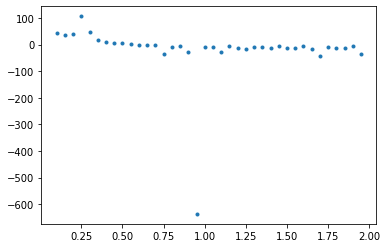

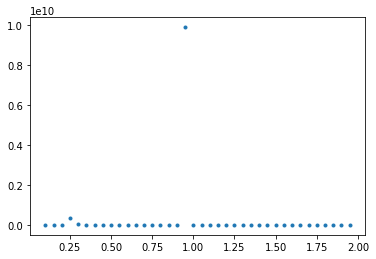